In [1]:
import pandas as pd
import numpy as np

In [2]:
import itertools

In [3]:
df_income = pd.read_csv('data/ACS_14_5YR_S1901/ACS_14_5YR_S1901.csv',skiprows=0, dtype={'GEO.id2':object,'HC01_EST_VC13':str})


In [4]:
df_income = df_income[['GEO.id2','HC01_EST_VC13']]


In [5]:
#df_income
df_income =df_income.drop(df_income.index[[0]])
df_income.head()

,GEO.id2,HC01_EST_VC13
1,36005000100,NaN
2,36005000200,74837
3,36005000400,77991
4,36005001600,32354
5,36005001900,34635


In [6]:
mean = df_income['HC01_EST_VC13'].astype(float).mean()
#df_income['HC01_EST_VC13'].fillna(mean,inplace=True)
df_income.dropna(inplace=True)
df_income.head()

,GEO.id2,HC01_EST_VC13
2,36005000200,74837
3,36005000400,77991
4,36005001600,32354
5,36005001900,34635
6,36005002000,23423


In [7]:
df_income.rename(columns={'HC01_EST_VC13': 'Median_Income'}, inplace=True)
df_income.head()

,GEO.id2,Median_Income
2,36005000200,74837
3,36005000400,77991
4,36005001600,32354
5,36005001900,34635
6,36005002000,23423


In [8]:
len(df_income)

2110

In [9]:
df_age = pd.read_csv('data/ACS_14_5YR_B01001/ACS_14_5YR_B01001.csv',skiprows=0)

In [10]:
df_age2 = df_age.iloc[:,1::2]

In [11]:
df_age2 =df_age2.drop(df_age2.index[[0]])

In [12]:
col_list = df_age2.iloc[:,6:13:1].columns.values.tolist()
print (col_list)

col_list2 = df_age2.iloc[:,30:37:1].columns.values.tolist()
print (col_list2)

df_age2['Male(15-34)'] = df_age2[col_list].astype('int').sum(axis=1)
df_age2['FeMale(15-34)'] = df_age2[col_list2].astype('int').sum(axis=1)
df_age2['(15-34)'] = df_age2[['Male(15-34)','FeMale(15-34)']].astype('int').sum(axis=1)
df_age2[['HD01_VD01','Male(15-34)','FeMale(15-34)','(15-34)']]

['HD01_VD06', 'HD01_VD07', 'HD01_VD08', 'HD01_VD09', 'HD01_VD10', 'HD01_VD11', 'HD01_VD12']
['HD01_VD30', 'HD01_VD31', 'HD01_VD32', 'HD01_VD33', 'HD01_VD34', 'HD01_VD35', 'HD01_VD36']


,HD01_VD01,Male(15-34),FeMale(15-34),(15-34)
1,8430,4925,430,5355
2,5095,734,758,1492
3,5572,877,614,1491
4,5412,618,690,1308
5,2569,429,464,893
6,8959,992,1487,2479
7,4860,616,773,1389
8,0,0,0,0
9,5143,555,1009,1564
10,3172,585,386,971


In [13]:
def calc_percentage(a, b):
    if(int(a) == 0):
        return 0
    return (float(b)/float(a))*100.0

df_age2['percentage'] = df_age2.apply(lambda row: calc_percentage(row['HD01_VD01'], row['(15-34)']), axis=1)
df_age2[['GEO.id2','HD01_VD01','Male(15-34)','FeMale(15-34)','(15-34)','percentage']]

,GEO.id2,HD01_VD01,Male(15-34),FeMale(15-34),(15-34),percentage
1,36005000100,8430,4925,430,5355,63.523132
2,36005000200,5095,734,758,1492,29.283611
3,36005000400,5572,877,614,1491,26.758794
4,36005001600,5412,618,690,1308,24.168514
5,36005001900,2569,429,464,893,34.760607
6,36005002000,8959,992,1487,2479,27.670499
7,36005002300,4860,616,773,1389,28.580247
8,36005002400,0,0,0,0,0.000000
9,36005002500,5143,555,1009,1564,30.410266
10,36005002701,3172,585,386,971,30.611602


In [14]:
df_age2.rename(columns={'HD01_VD01': 'Total_pop', '(15-34)':'pop_15_34', 'percentage':'percentage(youth)'}, inplace=True)
df_age2[['GEO.id2','Total_pop','Male(15-34)','FeMale(15-34)','pop_15_34','percentage(youth)']]

,GEO.id2,Total_pop,Male(15-34),FeMale(15-34),pop_15_34,percentage(youth)
1,36005000100,8430,4925,430,5355,63.523132
2,36005000200,5095,734,758,1492,29.283611
3,36005000400,5572,877,614,1491,26.758794
4,36005001600,5412,618,690,1308,24.168514
5,36005001900,2569,429,464,893,34.760607
6,36005002000,8959,992,1487,2479,27.670499
7,36005002300,4860,616,773,1389,28.580247
8,36005002400,0,0,0,0,0.000000
9,36005002500,5143,555,1009,1564,30.410266
10,36005002701,3172,585,386,971,30.611602


In [15]:
df_combined = df_age2.merge(df_income, on='GEO.id2')
df_combined = df_combined[['GEO.id2','pop_15_34','percentage(youth)','Median_Income']]
df_combined.head()

,GEO.id2,pop_15_34,percentage(youth),Median_Income
0,36005000200,1492,29.283611,74837
1,36005000400,1491,26.758794,77991
2,36005001600,1308,24.168514,32354
3,36005001900,893,34.760607,34635
4,36005002000,2479,27.670499,23423


In [16]:
len(df_combined)

2110

##==============================================================

In [17]:
df_edu = pd.read_csv('data/ACS_14_5YR_B15001/ACS_14_5YR_B15001.csv',skiprows=0)

In [18]:
df2 = df_edu.iloc[:,1::2]
df2.head()

,GEO.id2,HD01_VD01,HD01_VD02,HD01_VD03,HD01_VD04,HD01_VD05,HD01_VD06,HD01_VD07,HD01_VD08,HD01_VD09,...,HD01_VD74,HD01_VD75,HD01_VD76,HD01_VD77,HD01_VD78,HD01_VD79,HD01_VD80,HD01_VD81,HD01_VD82,HD01_VD83
0,Id2,Estimate; Total:,Estimate; Male:,Estimate; Male: - 18 to 24 years:,Estimate; Male: - 18 to 24 years: - Less than ...,Estimate; Male: - 18 to 24 years: - 9th to 12t...,Estimate; Male: - 18 to 24 years: - High schoo...,Estimate; Male: - 18 to 24 years: - Some colle...,Estimate; Male: - 18 to 24 years: - Associate'...,Estimate; Male: - 18 to 24 years: - Bachelor's...,...,Estimate; Female: - 45 to 64 years: - Bachelor...,Estimate; Female: - 45 to 64 years: - Graduate...,Estimate; Female: - 65 years and over:,Estimate; Female: - 65 years and over: - Less ...,Estimate; Female: - 65 years and over: - 9th t...,Estimate; Female: - 65 years and over: - High ...,Estimate; Female: - 65 years and over: - Some ...,Estimate; Female: - 65 years and over: - Assoc...,Estimate; Female: - 65 years and over: - Bache...,Estimate; Female: - 65 years and over: - Gradu...
1,36005000100,8073,7297,2449,159,1822,354,106,5,3,...,0,15,0,0,0,0,0,0,0,0
2,36005000200,3948,1882,232,5,75,57,27,0,51,...,53,24,408,116,65,123,35,30,30,9
3,36005000400,4246,2167,342,10,66,68,188,0,10,...,180,88,318,76,62,51,54,0,56,19
4,36005001600,4177,1686,371,0,84,85,151,0,51,...,84,0,557,124,179,164,79,7,4,0


In [19]:
df2.drop(df2.index[[0]],inplace=True)
df2.head()

/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,GEO.id2,HD01_VD01,HD01_VD02,HD01_VD03,HD01_VD04,HD01_VD05,HD01_VD06,HD01_VD07,HD01_VD08,HD01_VD09,...,HD01_VD74,HD01_VD75,HD01_VD76,HD01_VD77,HD01_VD78,HD01_VD79,HD01_VD80,HD01_VD81,HD01_VD82,HD01_VD83
1,36005000100,8073,7297,2449,159,1822,354,106,5,3,...,0,15,0,0,0,0,0,0,0,0
2,36005000200,3948,1882,232,5,75,57,27,0,51,...,53,24,408,116,65,123,35,30,30,9
3,36005000400,4246,2167,342,10,66,68,188,0,10,...,180,88,318,76,62,51,54,0,56,19
4,36005001600,4177,1686,371,0,84,85,151,0,51,...,84,0,557,124,179,164,79,7,4,0
5,36005001900,1961,1081,145,28,23,61,24,0,9,...,67,6,57,29,14,11,0,3,0,0


In [20]:
list1 = ['18_24', '25_34', '35_44', '45_64', '65_plus']
my_iter = iter(list1)

In [21]:
for i in range(3,41,8):
    list2 = ['_All','_less_9', '_under_12', '_high_school', '_some_college', '_associate', '_bachelor', '_graduate']
    my_iter2 = iter(list2)
    print i, (i+41)
    label1 = my_iter.next()
    print label1
    print tuple(df2.iloc[:,i::41].columns.values.tolist())
    print tuple(df2.iloc[:,(i+1)::41].columns.values.tolist())
    print tuple(df2.iloc[:,(i+2)::41].columns.values.tolist())
    print tuple(df2.iloc[:,(i+3)::41].columns.values.tolist())
    print tuple(df2.iloc[:,(i+4)::41].columns.values.tolist())
    print tuple(df2.iloc[:,(i+5)::41].columns.values.tolist())
    print tuple(df2.iloc[:,(i+6)::41].columns.values.tolist())
    print tuple(df2.iloc[:,(i+7)::41].columns.values.tolist())
    print '----------------------------------------------------'
    col_list = df2.iloc[:,i::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)
    col_list = df2.iloc[:,(i+1)::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)
    col_list = df2.iloc[:,(i+2)::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)
    col_list = df2.iloc[:,(i+3)::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)
    col_list = df2.iloc[:,(i+4)::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)
    col_list = df2.iloc[:,(i+5)::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)
    col_list = df2.iloc[:,(i+6)::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)
    col_list = df2.iloc[:,(i+7)::41].columns.values.tolist()
    df2[label1 + my_iter2.next()] = df2[col_list].astype('int').sum(axis=1)

/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

3 44
18_24
('HD01_VD03', 'HD01_VD44')
('HD01_VD04', 'HD01_VD45')
('HD01_VD05', 'HD01_VD46')
('HD01_VD06', 'HD01_VD47')
('HD01_VD07', 'HD01_VD48')
('HD01_VD08', 'HD01_VD49')
('HD01_VD09', 'HD01_VD50')
('HD01_VD10', 'HD01_VD51')
----------------------------------------------------
11 52
25_34
('HD01_VD11', 'HD01_VD52')
('HD01_VD12', 'HD01_VD53')
('HD01_VD13', 'HD01_VD54')
('HD01_VD14', 'HD01_VD55')
('HD01_VD15', 'HD01_VD56')
('HD01_VD16', 'HD01_VD57')
('HD01_VD17', 'HD01_VD58')
('HD01_VD18', 'HD01_VD59')
----------------------------------------------------
19 60
35_44
('HD01_VD19', 'HD01_VD60')
('HD01_VD20', 'HD01_VD61')
('HD01_VD21', 'HD01_VD62')
('HD01_VD22', 'HD01_VD63')
('HD01_VD23', 'HD01_VD64')
('HD01_VD24', 'HD01_VD65')
('HD01_VD25', 'HD01_VD66')
('HD01_VD26', 'HD01_VD67')
----------------------------------------------------
27 68
45_64
('HD01_VD27', 'HD01_VD68')
('HD01_VD28', 'HD01_VD69')
('HD01_VD29', 'HD01_VD70')
('HD01_VD30', 'HD01_VD71')
('HD01_VD31', 'HD01_VD72')
('HD01_VD32

/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
df2.head()

,GEO.id2,HD01_VD01,HD01_VD02,HD01_VD03,HD01_VD04,HD01_VD05,HD01_VD06,HD01_VD07,HD01_VD08,HD01_VD09,...,45_64_bachelor,45_64_graduate,65_plus_All,65_plus_less_9,65_plus_under_12,65_plus_high_school,65_plus_some_college,65_plus_associate,65_plus_bachelor,65_plus_graduate
1,36005000100,8073,7297,2449,159,1822,354,106,5,3,...,39,39,56,16,32,0,6,0,2,0
2,36005000200,3948,1882,232,5,75,57,27,0,51,...,125,53,751,203,113,320,35,30,34,16
3,36005000400,4246,2167,342,10,66,68,188,0,10,...,341,226,516,111,120,107,79,0,77,22
4,36005001600,4177,1686,371,0,84,85,151,0,51,...,113,10,867,209,205,267,123,12,15,36
5,36005001900,1961,1081,145,28,23,61,24,0,9,...,67,6,95,33,22,34,3,3,0,0


In [23]:
df2.drop(df2.columns[1:84], axis=1, inplace=True)
df2.head()

/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,GEO.id2,18_24_All,18_24_less_9,18_24_under_12,18_24_high_school,18_24_some_college,18_24_associate,18_24_bachelor,18_24_graduate,25_34_All,...,45_64_bachelor,45_64_graduate,65_plus_All,65_plus_less_9,65_plus_under_12,65_plus_high_school,65_plus_some_college,65_plus_associate,65_plus_bachelor,65_plus_graduate
1,36005000100,2685,159,1959,431,128,5,3,0,2313,...,39,39,56,16,32,0,6,0,2,0
2,36005000200,575,23,178,109,164,8,66,27,754,...,125,53,751,203,113,320,35,30,34,16
3,36005000400,446,10,97,104,209,16,10,0,885,...,341,226,516,111,120,107,79,0,77,22
4,36005001600,626,36,84,184,231,23,68,0,493,...,113,10,867,209,205,267,123,12,15,36
5,36005001900,319,65,39,90,61,0,42,22,541,...,67,6,95,33,22,34,3,3,0,0


In [24]:
df2.iloc[:3,:].T

,1,2,3
GEO.id2,36005000100,36005000200,36005000400
18_24_All,2685,575,446
18_24_less_9,159,23,10
18_24_under_12,1959,178,97
18_24_high_school,431,109,104
18_24_some_college,128,164,209
18_24_associate,5,8,16
18_24_bachelor,3,66,10
18_24_graduate,0,27,0
25_34_All,2313,754,885


In [25]:
col_list = df2.iloc[:,4:9:1].columns.values.tolist()
df2['18_24_GOOD'] = df2[col_list].astype('int').sum(axis=1)

col_list = df2.iloc[:,12:17:1].columns.values.tolist()
df2['25_34_GOOD'] = df2[col_list].astype('int').sum(axis=1)

col_list = df2.iloc[:,20:25:1].columns.values.tolist()
df2['35_44_GOOD'] = df2[col_list].astype('int').sum(axis=1)

col_list = df2.iloc[:,28:33:1].columns.values.tolist()
df2['45_64_GOOD'] = df2[col_list].astype('int').sum(axis=1)

col_list = df2.iloc[:,36:41:1].columns.values.tolist()
df2['65_GOOD'] = df2[col_list].astype('int').sum(axis=1)

col_list = df2.iloc[:,41:43:1].columns.values.tolist()
df2['18_34_GOOD'] = df2[col_list].astype('int').sum(axis=1)

df2['18_34_TOTAL'] = df2[['18_24_All','25_34_All']].astype('int').sum(axis=1)

df2['per_18_34_TOTAL'] = df2.apply(lambda row: calc_percentage(row['18_34_TOTAL'], row['18_34_GOOD']), axis=1)




/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [26]:
df2.iloc[:10,:].T

,1,2,3,4,5,6,7,8,9,10
GEO.id2,36005000100,36005000200,36005000400,36005001600,36005001900,36005002000,36005002300,36005002400,36005002500,36005002701
18_24_All,2685,575,446,626,319,991,536,0,497,440
18_24_less_9,159,23,10,36,65,100,6,0,71,74
18_24_under_12,1959,178,97,84,39,314,201,0,153,78
18_24_high_school,431,109,104,184,90,255,113,0,101,130
18_24_some_college,128,164,209,231,61,276,183,0,133,158
18_24_associate,5,8,16,23,0,0,6,0,21,0
18_24_bachelor,3,66,10,68,42,46,27,0,18,0
18_24_graduate,0,27,0,0,22,0,0,0,0,0
25_34_All,2313,754,885,493,541,929,608,0,857,317


In [27]:
df_edu3 = df2[['GEO.id2', 'per_18_34_TOTAL']]

In [28]:
df_combined2 = df_combined.merge(df_edu3, on='GEO.id2')
df_combined2

,GEO.id2,pop_15_34,percentage(youth),Median_Income,per_18_34_TOTAL
0,36005000200,1492,29.283611,74837,79.157261
1,36005000400,1491,26.758794,77991,89.406461
2,36005001600,1308,24.168514,32354,83.199285
3,36005001900,893,34.760607,34635,75.348837
4,36005002000,2479,27.670499,23423,65.104167
5,36005002300,1389,28.580247,14304,63.811189
6,36005002500,1564,30.410266,15683,59.896603
7,36005002701,971,30.611602,20159,61.558785
8,36005002702,1867,39.867606,18416,59.233926
9,36005002800,1373,23.894883,50388,89.016393


###================================================================ 

In [29]:
#reading in puma13 files
pums13 = pd.read_csv("../Data/Spreadsheets/PUMs_NY/PUMS_NY_2014/ss14hny.csv", usecols = ['PUMA','WGTP', 'ACCESS', 'BROADBND', \
        'COMPOTHX', 'DIALUP', 'DSL', 'FIBEROP','MODEM', 'SATELLITE','OTHSVCEX','HANDHELD','LAPTOP'], dtype = {'PUMA':str})
#print "PUMA 2013:\n", pums13.head(), len(pums13)
#print ""
#Reading in puma_nyc file and merging it
puma_nyc = pd.read_csv("../Data/Spreadsheets/PUMs_NY/PUMA_NYC.txt", usecols = ['PUMACE10'], dtype={'PUMACE10':str})
p13 = pd.merge(pums13,puma_nyc, how='inner', left_on='PUMA',right_on='PUMACE10')
#print "Merged files:\n", pums13nyc.head(), len(pums13nyc)
del p13['PUMACE10']
p13.head()

,PUMA,WGTP,ACCESS,BROADBND,COMPOTHX,DIALUP,DSL,FIBEROP,HANDHELD,LAPTOP,MODEM,OTHSVCEX,SATELLITE
0,03808,631,1,2,2,2,2,2,1,1,1,2,2
1,03808,189,1,1,2,2,2,1,1,1,1,2,2
2,03808,197,2,NaN,2,NaN,NaN,NaN,1,1,NaN,NaN,NaN
3,03808,168,1,2,2,2,2,2,2,1,1,2,2
4,03808,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#p13i = p13.drop(labels=['COMPOTHX','HANDHELD','LAPTOP'],axis=1)
#p13c = p13.drop(labels= ['ACCESS','BROADBND','DIALUP','DSL','FIBEROP','MODEM','OTHSVCEX','SATELLITE'],axis=1)
#p13i = p13i.dropna(how='all',thresh=1,subset=['ACCESS','BROADBND','DIALUP','DSL','FIBEROP','MODEM','SATELLITE','OTHSVCEX'])
#p13c = p13c.dropna(how='all',thresh=1,subset=['COMPOTHX','HANDHELD','LAPTOP'])
p13 = p13.dropna(how='all',thresh=1,subset=['ACCESS','BROADBND','DIALUP','DSL','FIBEROP','MODEM','SATELLITE','OTHSVCEX'])
p13 = p13.dropna(how='all',thresh=1,subset=['COMPOTHX','HANDHELD','LAPTOP'])
p13.head()

,PUMA,WGTP,ACCESS,BROADBND,COMPOTHX,DIALUP,DSL,FIBEROP,HANDHELD,LAPTOP,MODEM,OTHSVCEX,SATELLITE
0,03808,631,1,2,2,2,2,2,1,1,1,2,2
1,03808,189,1,1,2,2,2,1,1,1,1,2,2
2,03808,197,2,NaN,2,NaN,NaN,NaN,1,1,NaN,NaN,NaN
3,03808,168,1,2,2,2,2,2,2,1,1,2,2
6,03808,805,1,2,2,2,2,2,2,1,1,2,2


In [31]:
# PUMAreas=p13c.groupby('PUMA')
# Tot_HH = (PUMAreas.WGTP.sum()).sum()
# print "For Computer Access:\nTotal number of Households in NYC: {0:,}".format(Tot_HH) #No of HH in NYC
# PUMAreas=p13i.groupby('PUMA')
# Tot_HH = (PUMAreas.WGTP.sum()).sum()
# print "For Internet Access:\nTotal number of Households in NYC: {0:,}".format(Tot_HH) #No of HH in NYC
PUMAreas=p13.groupby('PUMA')
Tot_HH = (PUMAreas.WGTP.sum()).sum()
print "Total number of Households in NYC: {0:,}".format(Tot_HH) #No of HH in NYC

Total number of Households in NYC: 3,148,063


In [32]:
print "ACS defines Broadband Access as Internet Access other than Dial-Up, through Mobile BB, DSL, Fiberop, Modem, or Satellite"
BB= p13.ix[(p13.BROADBND==1)|(p13.DSL==1)|(p13.FIBEROP==1)|(p13.MODEM==1)|(p13.SATELLITE==1)].WGTP.sum()
print "Number of NYC HH with High Speed Internet(HSI) access: {0:,} ({1:.2f}%)".format(BB,BB/float(Tot_HH)*100)
print "Number of NYC HH without HSI Access: {0:,} ({1:.2f}%)".format(Tot_HH-BB,(Tot_HH-BB)/float(Tot_HH)*100)

ACS defines Broadband Access as Internet Access other than Dial-Up, through Mobile BB, DSL, Fiberop, Modem, or Satellite
Number of NYC HH with High Speed Internet(HSI) access: 2,358,767 (74.93%)
Number of NYC HH without HSI Access: 789,296 (25.07%)


In [33]:
Comp= p13.ix[(p13.LAPTOP==1)|(p13.HANDHELD==1)].WGTP.sum()
print "Number of NYC HH with computer Access: {0:,} ({1:.2f}%)".format(Comp,Comp/float(Tot_HH)*100)
print "Number of NYC HH without computer Access: {0:,} ({1:.2f}%)".format(Tot_HH-Comp,(Tot_HH-Comp)/float(Tot_HH)*100)

Number of NYC HH with computer Access: 2,634,142 (83.68%)
Number of NYC HH without computer Access: 513,921 (16.32%)


In [34]:
onepuma=p13.ix[p13.PUMA=='04011']
print "length of PUMA 04011:{}".format(len(onepuma))
print "population of PUMA 04011:{}".format( onepuma.WGTP.sum())
onepuma.head()

length of PUMA 04011:336
population of PUMA 04011:41281


,PUMA,WGTP,ACCESS,BROADBND,COMPOTHX,DIALUP,DSL,FIBEROP,HANDHELD,LAPTOP,MODEM,OTHSVCEX,SATELLITE
3811,04011,203,1,2,2,2,2,2,1,1,1,2,2
3812,04011,33,2,NaN,2,NaN,NaN,NaN,2,1,NaN,NaN,NaN
3813,04011,70,3,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN
3814,04011,78,3,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN
3815,04011,185,3,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN


In [35]:
p13['HSI']=0
p13['Device']=0

In [36]:
p13.ix[(p13.BROADBND==1)|(p13.DSL==1)|(p13.FIBEROP==1)|(p13.MODEM==1)|(p13.SATELLITE==1),'HSI']\
=p13.ix[(p13.BROADBND==1)|(p13.DSL==1)|(p13.FIBEROP==1)|(p13.MODEM==1)|(p13.SATELLITE==1),'WGTP']
p13.ix[(p13.LAPTOP==1)|(p13.HANDHELD==1),'Device']=p13.ix[(p13.LAPTOP==1)|(p13.HANDHELD==1),'WGTP']

In [37]:
p13.head(20)

,PUMA,WGTP,ACCESS,BROADBND,COMPOTHX,DIALUP,DSL,FIBEROP,HANDHELD,LAPTOP,MODEM,OTHSVCEX,SATELLITE,HSI,Device
0,03808,631,1,2,2,2,2,2,1,1,1,2,2,631,631
1,03808,189,1,1,2,2,2,1,1,1,1,2,2,189,189
2,03808,197,2,NaN,2,NaN,NaN,NaN,1,1,NaN,NaN,NaN,0,197
3,03808,168,1,2,2,2,2,2,2,1,1,2,2,168,168
6,03808,805,1,2,2,2,2,2,2,1,1,2,2,805,805
7,03808,347,1,1,2,2,2,2,1,1,2,2,1,347,347
8,03808,114,1,2,2,2,2,2,1,1,1,2,2,114,114
9,03808,47,1,1,2,2,2,2,1,1,2,1,2,47,47
10,03808,187,1,2,2,2,2,2,1,1,1,2,2,187,187
11,03808,358,1,1,2,2,2,1,1,1,2,2,2,358,358


In [38]:
HSI = PUMAreas.HSI.sum()
Device = PUMAreas.Device.sum()
Total = PUMAreas.WGTP.sum()

In [39]:
Final = pd.concat([HSI,Device,Total],axis=1)
Final['withoutHSI']=(Final.WGTP-Final.HSI)/Final.WGTP*100
Final['WithoutDevice']=(Final.WGTP-Final.Device)/Final.WGTP*100
Final = Final.reset_index()

In [40]:
Final.head()

,PUMA,HSI,Device,WGTP,withoutHSI,WithoutDevice
0,03701,30930,34991,42035,26.418461,16.757464
1,03702,31351,36226,44830,30.066919,19.192505
2,03703,32307,38264,47050,31.334750,18.673751
3,03704,32748,37515,44922,27.100307,16.488580
4,03705,36674,43781,57556,36.281187,23.933213


In [41]:
Final.WGTP.sum()

3148063

In [42]:
lookup = pd.read_csv("../Data/Spreadsheets/PUMs_NY/nyc2010census_tabulation_equiv.csv",dtype=str)
lookup.head()

,Borough,2010 Census Bureau FIPS County Code,2010 NYC Borough Code,2010 Census Tract,PUMA
0,Bronx,005,2,031000,3704
1,Bronx,005,2,031200,3704
2,Bronx,005,2,031400,3704
3,Bronx,005,2,031600,3704
4,Bronx,005,2,031800,3704


In [43]:
lookup['censustract']='36'+lookup['2010 Census Bureau FIPS County Code']+lookup['2010 Census Tract']
lookup = lookup.drop(labels = ['2010 Census Bureau FIPS County Code','2010 Census Tract'],axis=1)

In [44]:
lookup['PUMA']='0'+lookup['PUMA']

In [45]:
pumcensus = pd.merge(lookup,Final, how='outer', left_on='PUMA',right_on='PUMA')

In [46]:
pumcensus.head()

,Borough,2010 NYC Borough Code,PUMA,censustract,HSI,Device,WGTP,withoutHSI,WithoutDevice
0,Bronx,2,03704,36005031000,32748,37515,44922,27.100307,16.48858
1,Bronx,2,03704,36005031200,32748,37515,44922,27.100307,16.48858
2,Bronx,2,03704,36005031400,32748,37515,44922,27.100307,16.48858
3,Bronx,2,03704,36005031600,32748,37515,44922,27.100307,16.48858
4,Bronx,2,03704,36005031800,32748,37515,44922,27.100307,16.48858


In [47]:
len(pumcensus)

2168

### =======================================================================

In [48]:
df_hotspot = pd.read_csv('../Data/Spreadsheets/Census_tract_HotSpot_Count.txt', skiprows=0, dtype={'BoroCode':str,'CT2010':str})

In [49]:
df_hotspot['BoroCode'] = df_hotspot['BoroCode'].apply(lambda x: '{0:0>3}'.format(x))
df_hotspot['CT2010'] = df_hotspot['CT2010'].apply(lambda x: '{0:0>6}'.format(x))
#df_hotspot[df_hotspot['BoroCode'].apply(lambda x: '005' in x)] = '085'
df_hotspot['BoroCode'].loc[df_hotspot['BoroCode'] == '005'] = '085'
df_hotspot['BoroCode'].loc[df_hotspot['BoroCode'] == '004'] = '081'
df_hotspot['BoroCode'].loc[df_hotspot['BoroCode'] == '003'] = '047'
df_hotspot['BoroCode'].loc[df_hotspot['BoroCode'] == '002'] = '005'
df_hotspot['BoroCode'].loc[df_hotspot['BoroCode'] == '001'] = '061'
df_hotspot['GEO.id2'] = '36' + df_hotspot['BoroCode'] + df_hotspot['CT2010']
df_hotspot.head()

/Users/sachinv/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,FID,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape_Leng,Shape_Le_1,Shape_Area,Count_,GEO.id2
0,0,1,9.00,085,Staten Island,000900,5000900,I,SI22,West New Brighton-New Brighton-St. George,3903,7729.016729,7729.016993,2497009.840170,0,36085000900
1,1,2,125.00,085,Staten Island,012500,5012500,I,SI22,West New Brighton-New Brighton-St. George,3903,10582.855530,10582.855623,4954936.150280,3,36085012500
2,2,3,133.01,085,Staten Island,013301,5013301,E,SI22,West New Brighton-New Brighton-St. George,3903,3428.312676,3428.312704,721784.631595,0,36085013301
3,3,4,197.00,085,Staten Island,019700,5019700,I,SI07,Westerleigh,3903,9097.697231,9097.696906,3231719.930010,0,36085019700
4,4,5,64.00,085,Staten Island,006400,5006400,I,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,12726.360449,12726.360703,7643183.469570,0,36085006400


In [50]:
df_hotspot = df_hotspot[['GEO.id2','Count_']]

In [51]:
len(df_hotspot)

2166

In [52]:
df_hotspot.head()

,GEO.id2,Count_
0,36085000900,0
1,36085012500,3
2,36085013301,0
3,36085019700,0
4,36085006400,0


In [53]:
df_combined22 = df_combined2.merge(df_hotspot,on='GEO.id2')

In [54]:
df_combined22.head()

,GEO.id2,pop_15_34,percentage(youth),Median_Income,per_18_34_TOTAL,Count_
0,36005000200,1492,29.283611,74837,79.157261,0
1,36005000400,1491,26.758794,77991,89.406461,0
2,36005001600,1308,24.168514,32354,83.199285,0
3,36005001900,893,34.760607,34635,75.348837,0
4,36005002000,2479,27.670499,23423,65.104167,1


In [55]:
len(df_combined22)

2110

In [56]:
df_combined3 = df_combined22.merge(pumcensus,left_on='GEO.id2',right_on='censustract')

In [57]:
df_combined3.head()

,GEO.id2,pop_15_34,percentage(youth),Median_Income,per_18_34_TOTAL,Count_,Borough,2010 NYC Borough Code,PUMA,censustract,HSI,Device,WGTP,withoutHSI,WithoutDevice
0,36005000200,1492,29.283611,74837,79.157261,0,Bronx,2,03709,36005000200,46682,52527,64011,27.071910,17.940666
1,36005000400,1491,26.758794,77991,89.406461,0,Bronx,2,03709,36005000400,46682,52527,64011,27.071910,17.940666
2,36005001600,1308,24.168514,32354,83.199285,0,Bronx,2,03709,36005001600,46682,52527,64011,27.071910,17.940666
3,36005001900,893,34.760607,34635,75.348837,0,Bronx,2,03710,36005001900,32752,40073,52191,37.245885,23.218563
4,36005002000,2479,27.670499,23423,65.104167,1,Bronx,2,03709,36005002000,46682,52527,64011,27.071910,17.940666


In [58]:
len(df_combined3)

2110

In [59]:
df_combined3.rename(columns={'percentage(youth)': 'per_15_34', 'Median_Income':'Income', 'per_18_34_TOTAL':'per_high_school_or_more','Count_':'hotspot_count' }, inplace=True)
df_combined3.head()

,GEO.id2,pop_15_34,per_15_34,Income,per_high_school_or_more,hotspot_count,Borough,2010 NYC Borough Code,PUMA,censustract,HSI,Device,WGTP,withoutHSI,WithoutDevice
0,36005000200,1492,29.283611,74837,79.157261,0,Bronx,2,03709,36005000200,46682,52527,64011,27.071910,17.940666
1,36005000400,1491,26.758794,77991,89.406461,0,Bronx,2,03709,36005000400,46682,52527,64011,27.071910,17.940666
2,36005001600,1308,24.168514,32354,83.199285,0,Bronx,2,03709,36005001600,46682,52527,64011,27.071910,17.940666
3,36005001900,893,34.760607,34635,75.348837,0,Bronx,2,03710,36005001900,32752,40073,52191,37.245885,23.218563
4,36005002000,2479,27.670499,23423,65.104167,1,Bronx,2,03709,36005002000,46682,52527,64011,27.071910,17.940666


In [60]:
df_combined3 = df_combined3[['GEO.id2','PUMA','per_15_34','Income','per_high_school_or_more','HSI','Device', 'WGTP','withoutHSI','WithoutDevice', 'hotspot_count']]
df_combined4 = df_combined3.iloc[:,:]
df_combined4.head()

,GEO.id2,PUMA,per_15_34,Income,per_high_school_or_more,HSI,Device,WGTP,withoutHSI,WithoutDevice,hotspot_count
0,36005000200,03709,29.283611,74837,79.157261,46682,52527,64011,27.071910,17.940666,0
1,36005000400,03709,26.758794,77991,89.406461,46682,52527,64011,27.071910,17.940666,0
2,36005001600,03709,24.168514,32354,83.199285,46682,52527,64011,27.071910,17.940666,0
3,36005001900,03710,34.760607,34635,75.348837,32752,40073,52191,37.245885,23.218563,0
4,36005002000,03709,27.670499,23423,65.104167,46682,52527,64011,27.071910,17.940666,1


In [61]:
#cols_to_normalise = ['per_15_34','Income','per_high_school_or_more', 'HSI','Device', 'WGTP','withoutHSI','WithoutDevice']

cols_to_normalise = ['Income','hotspot_count']
df_combined4[cols_to_normalise] = df_combined4[cols_to_normalise].astype('float').apply(lambda x: (100.0 - 100.0*((x - x.min()) / (x.max()))))


cols_to_normalise = ['per_15_34','per_high_school_or_more','withoutHSI']


#df_combined3[cols_to_normalise] = df_combined3[cols_to_normalise].astype('float').apply(lambda x: (x - x.mean()) / (x.max() - x.min()))
#df_combined3[cols_to_normalise] = df_combined3[cols_to_normalise].astype('float').apply(lambda x: (x - x.mean()) / (x.std()))
#df_combined3[cols_to_normalise] = df_combined3[cols_to_normalise].astype('float').apply(lambda x: 100.0*((x ) / (x.max())))

df_combined4[cols_to_normalise] = df_combined4[cols_to_normalise].astype('float').apply(lambda x: 100.0*((x - x.min()) / (x.max())))
df_combined4 = df_combined4[['GEO.id2','PUMA','per_15_34','Income','per_high_school_or_more', 'hotspot_count', 'withoutHSI','WithoutDevice']]

In [62]:
df_combined4.head(100)

,GEO.id2,PUMA,per_15_34,Income,per_high_school_or_more,hotspot_count,withoutHSI,WithoutDevice
0,36005000200,03709,33.551747,71.795269,34.309656,100.000000,37.784585,17.940666
1,36005000400,03709,30.616440,70.437343,44.558856,100.000000,37.784585,17.940666
2,36005001600,03709,27.605028,90.085936,38.351680,100.000000,37.784585,17.940666
3,36005001900,03710,39.919204,89.103872,30.501232,100.000000,59.668445,23.218563
4,36005002000,03709,31.676372,93.931096,20.256561,96.969697,37.784585,17.940666
5,36005002300,03710,32.734029,97.857198,18.963584,96.969697,59.668445,23.218563
6,36005002500,03710,34.861576,97.263482,15.048997,100.000000,59.668445,23.218563
7,36005002701,03710,35.095645,95.336382,16.711179,100.000000,59.668445,23.218563
8,36005002702,03710,45.856509,96.086814,14.386321,96.969697,59.668445,23.218563
9,36005002800,03709,27.286909,82.321562,44.168788,100.000000,37.784585,17.940666


In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

In [64]:
XData = np.linspace(0,1,2110)

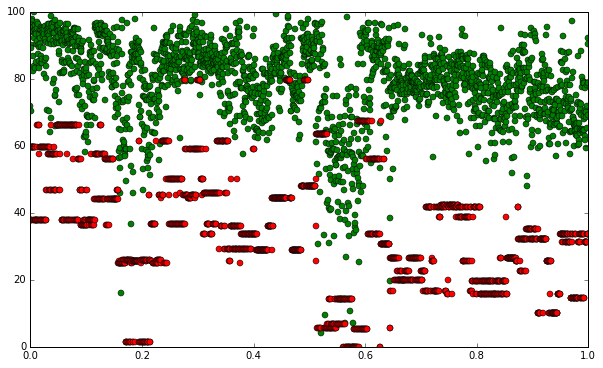

In [65]:
fig = plt.figure(figsize=[10,6])
plt.plot(XData, df_combined3['Income'], 'go');
plt.plot(XData, df_combined3['withoutHSI'], 'ro');


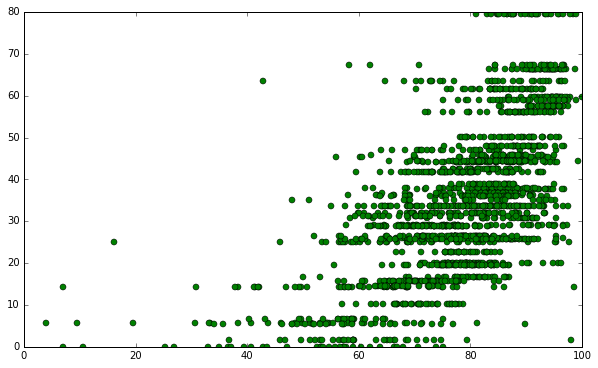

In [66]:
fig = plt.figure(figsize=[10,6])
plt.plot(df_combined4['Income'], df_combined4['withoutHSI'] ,'go');
#plt.plot(XData, df_combined3['withoutHSI'], 'ro');


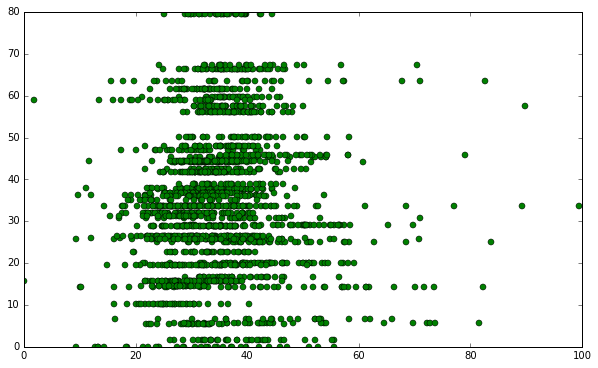

In [67]:
fig = plt.figure(figsize=[10,6])
plt.plot(df_combined4['per_15_34'], df_combined4['withoutHSI'] ,'go');


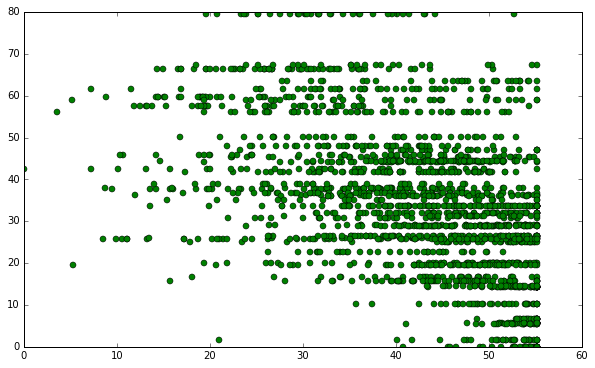

In [68]:
fig = plt.figure(figsize=[10,6])
plt.plot(df_combined4['per_high_school_or_more'], df_combined4['withoutHSI'] ,'go');


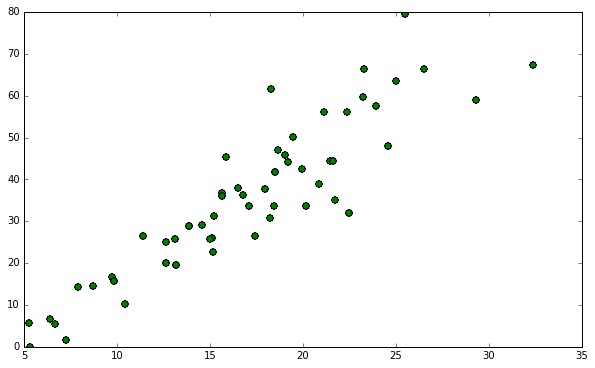

In [69]:
fig = plt.figure(figsize=[10,6])
plt.plot(df_combined4['WithoutDevice'], df_combined4['withoutHSI'] ,'go');


In [70]:
from sklearn.ensemble import RandomForestClassifier
#X = [[0, 0], [1, 1]]
#Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(df_combined4.iloc[:,:-1], df_combined4.iloc[:,-1])

In [71]:
clf.classes_

array([  5.28365247,   5.34927463,   6.39482733,   6.69039073,
         7.2741903 ,   7.90933146,   8.70319302,   9.726259  ,
         9.8258665 ,  10.44155364,  11.37399658,  12.61453452,
        12.62968927,  13.1230665 ,  13.17634191,  13.89273925,
        14.56421654,  14.98429593,  15.12831594,  15.15247108,
        15.19241815,  15.66024782,  15.66055931,  15.88747861,
        16.48858021,  16.75746402,  17.08490249,  17.40249533,
        17.94066645,  18.25034505,  18.28879095,  18.46082502,
        18.49748824,  18.67375133,  19.04581757,  19.19250502,
        19.48390152,  19.93552524,  20.1846987 ,  20.85111944,
        21.15344175,  21.46508079,  21.60675199,  21.72675763,
        22.35249302,  22.47158263,  23.21856259,  23.26002819,
        23.93321287,  24.5683401 ,  24.98029302,  25.50317378,
        26.49212475,  29.30617498,  32.36660566])

In [72]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.ensemble import RandomForestRegressor


In [73]:
regressor = RandomForestRegressor(n_estimators=150, min_samples_split=1,oob_score=False)
regressor.fit(df_combined4.iloc[:,2:-2], df_combined4.iloc[:,-1])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=1, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [74]:
regressor.feature_importances_

array([ 0.20223723,  0.59323939,  0.16771902,  0.03680437])

In [75]:
#regressor

In [76]:
weights = regressor.feature_importances_

In [77]:
weights

array([ 0.20223723,  0.59323939,  0.16771902,  0.03680437])

In [78]:
def sublst(row,arg1,arg2,arg3,arg4):
    #print arg5
    return ( row[0]*arg1 + row[1]*arg2 + row[2]*arg3 + row[3]*arg4 )

col_list = ['per_15_34','Income','per_high_school_or_more','hotspot_count']
df_combined4['score'] = df_combined4[col_list].astype('float').apply(sublst,args=(weights[0],weights[1],weights[2],weights[3]),axis=1)


/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [79]:
#pd.DataFrame.apply

In [80]:
#df_combined4['score']

In [81]:
df_combined5 = df_combined4.sort(columns=['score'],ascending=False)
df_combined5.head(100)

/Users/sachinv/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,GEO.id2,PUMA,per_15_34,Income,per_high_school_or_more,hotspot_count,withoutHSI,WithoutDevice,score
281,36005039700,03705,89.786366,95.859058,54.315575,100.000000,57.593413,23.933213,87.815706
1287,36061020300,03802,99.507148,88.811966,55.152395,100.000000,33.657828,18.460825,85.741348
316,36005043500,03702,60.806926,95.225302,35.152395,93.939394,44.226745,19.192505,78.141929
1340,36061026700,03801,71.019923,85.876108,52.987893,100.000000,30.781717,18.250345,77.875476
1290,36061020701,03802,77.071670,80.896903,55.152395,100.000000,33.657828,18.460825,76.508532
1076,36047121400,04008,41.085789,96.335236,41.051909,100.000000,48.019892,24.568340,76.024555
1301,36061021900,03802,40.366492,96.671058,40.734329,96.969697,33.657828,18.460825,75.913517
567,36047028700,04003,40.048865,94.443870,47.741121,100.000000,50.217261,19.483902,75.814726
271,36005038700,03705,48.233294,94.892494,35.507867,100.000000,57.593413,23.933213,75.684314
975,36047091000,04007,36.708334,98.952064,35.391201,96.969697,79.553869,25.503174,75.630739


In [82]:
df_combined5.tail(100)

,GEO.id2,PUMA,per_15_34,Income,per_high_school_or_more,hotspot_count,withoutHSI,WithoutDevice,score
1347,36061028100,03801,25.101015,58.394685,55.152395,96.969697,30.781717,18.250345,52.537401
1133,36061005600,03807,42.370449,57.309722,43.446046,72.727273,14.267971,7.909331,52.530676
1254,36061017100,03806,31.080713,57.285612,50.991203,100.000000,5.461720,6.690391,52.502390
2072,36085017700,03902,21.357273,61.798541,46.732436,100.000000,31.249054,15.192418,52.498919
1221,36061014402,03805,28.737517,56.684577,55.152395,100.000000,0.000000,5.349275,52.369862
454,36047016700,04005,28.442418,57.360096,52.652395,100.000000,1.539486,7.274190,52.291628
1152,36061007500,03810,32.209553,55.414051,54.834177,100.000000,5.636644,5.283652,52.264939
1131,36061005501,03810,40.197518,53.350038,52.003707,100.000000,5.636644,5.283652,52.181226
1250,36061016700,03806,28.493382,57.099188,54.569729,90.909091,5.461720,6.690391,52.134143
1919,36081109300,04104,20.041885,59.493856,53.949990,100.000000,10.178983,10.441554,52.076190


In [83]:
df_combined5.reset_index(inplace=True,drop=True)
df_combined5.tail(20)

,GEO.id2,PUMA,per_15_34,Income,per_high_school_or_more,hotspot_count,withoutHSI,WithoutDevice,score
2090,36061031704,03810,28.612730,38.358176,55.152395,100.000000,5.636644,5.283652,41.472682
2091,36061011402,03805,24.074919,40.672333,52.786803,93.939394,0.000000,5.349275,41.308005
2092,36047006700,04005,33.490809,36.800479,54.301331,96.969697,1.539486,7.274190,41.280856
2093,36061014500,03806,33.256094,34.020046,54.566076,93.939394,5.461720,6.690391,39.516800
2094,36061011202,03807,23.108437,37.887164,51.230826,100.000000,14.267971,7.909331,39.422365
2095,36061014900,03806,26.082704,35.697864,53.728344,84.848485,5.461720,6.690391,38.586332
2096,36061000900,03810,43.645290,30.627815,53.172197,60.606061,5.636644,5.283652,38.144885
2097,36061015001,03805,13.200254,37.051054,55.152395,100.000000,0.000000,5.349275,37.580269
2098,36061012200,03805,13.340671,36.636012,51.251686,100.000000,0.000000,5.349275,36.708225
2099,36061015002,03805,14.260295,34.965944,49.014287,100.000000,0.000000,5.349275,35.528203


In [84]:
df_combined5.rename(columns={'per_15_34': 'youth_pop', 'per_high_school_or_more':'Education_level','hotspot_count':'hotspot'}, inplace=True)

In [85]:
df_combined5['GEO.id2'] == '36061005000'
df_combined6 = df_combined5[df_combined5['GEO.id2'].isin(['36061005000','36061004800'])]
df_combined6

,GEO.id2,PUMA,youth_pop,Income,Education_level,hotspot,withoutHSI,WithoutDevice,score
1821,36061004800,03808,53.271369,58.625025,53.303803,87.878788,6.742394,6.394827,57.726512
1930,36061005000,03808,39.880127,58.615553,53.145706,96.969697,6.742394,6.394827,55.320755


In [86]:
df_combined5['RANK'] = df_combined5.index + int(1)
df_combined5[['GEO.id2','RANK','score']]

,GEO.id2,RANK,score
0,36005039700,1,87.815706
1,36061020300,2,85.741348
2,36005043500,3,78.141929
3,36061026700,4,77.875476
4,36061020701,5,76.508532
5,36047121400,6,76.024555
6,36061021900,7,75.913517
7,36047028700,8,75.814726
8,36005038700,9,75.684314
9,36047091000,10,75.630739


In [87]:
df_combined5.to_csv('final_rankings.csv', encoding='utf-8')